In [4]:
# setup
import os
import torch
import torchvision
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
# local utils
# !find . -name \*.pyc -delete
from vis_utils import *
from model_def import *
from model_train import *

%matplotlib inline


expName = 't_cifar-MLP_resume-training-3'
batchSize = 100

# create experiment folder
expDir = os.path.join('./data', expName)
if not os.path.exists(expDir):
    os.makedirs(expDir)

In [2]:
# setup and load CIFAR dataset
trainloader, testloader, classes = setup_cifar_data_mlp(batchSize)

# Check some random images to confirm the flattening and reshaping of images is correct
# dataiter = iter(trainloader)
# images, labels = dataiter.next()
# images = images[0:4]
# labels = labels[0:4]
# images = images.view(4, 3, 32, 32) # reshape flattened images to 3x32x32

# imshow(torchvision.utils.make_grid(images))
# print(' \t'.join('%5s' % classes[labels[j]] for j in range(4)))

# create a fully-connected network with ReLU non-linearities
net = MLP(input_dim=3072, fc1_dim=100, fc2_dim=100)

# dispay the network architecture
print(net)

Files already downloaded and verified
Files already downloaded and verified
MLP (
  (fc1): Linear (3072 -> 100)
  (fc2): Linear (100 -> 100)
  (fc3): Linear (100 -> 10)
)


In [5]:
# Train the network
from torch.optim.lr_scheduler import StepLR

# hyper-params
useGpu = True
seed = 0  # for repeatable results
modelPath = []
numEpochs = 5
learningRate = 0.03
numBatchesPerEpoch = len(trainloader.dataset) // batchSize 


# set random seed
torch.default_generator.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

# Define a Loss function and optimizer settings
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learningRate, momentum=0.9, weight_decay=0.018)
lr_scheduler = optim.lr_scheduler.StepLR(optimizer, 1, gamma=0.5)

if not os.path.isfile(os.path.join(expDir, 'net-trained.dat')):
    # Train the network
    train_cifar_net(net, trainloader, testloader, criterion, (optimizer,lr_scheduler), expDir, batchSize=batchSize,
                    numEpochs=numEpochs, useGpu=useGpu, fixFilterList=[], verboseFrequency=100, doVisFilter=False)

    # Save the network
    #    to be loaded as:
    #       net = Net()
    #       net.load_state_dict(torch.load(PATH))
    torch.save(net.state_dict(), os.path.join(expDir, 'net-trained.dat'))
else:
    print 'Loading network state dict from file.'
    net.load_state_dict(torch.load(os.path.join(expDir, 'net-trained.dat')))
    # delete this file to restart network training for further epochs
    


  0%|          | 0/5 [00:00<?, ?it/s]

epoch:   0 batch:   100 loss: 1.585 accu: 0.464 lr: 0.030000
epoch:   0 batch:   200 loss: 1.631 accu: 0.441 lr: 0.030000


epoch:   0 batch:   300 loss: 1.631 accu: 0.441 lr: 0.030000
epoch:   0 batch:   400 loss: 1.621 accu: 0.453 lr: 0.030000
epoch:   0 batch:   500 loss: 1.648 accu: 0.433 lr: 0.030000



 20%|██        | 1/5 [00:42<02:50, 42.60s/it]

epoch:   1 batch:   100 loss: 1.554 accu: 0.458 lr: 0.015000
epoch:   1 batch:   200 loss: 1.545 accu: 0.471 lr: 0.015000
epoch:   1 batch:   300 loss: 1.565 accu: 0.459 lr: 0.015000
epoch:   1 batch:   400 loss: 1.549 accu: 0.470 lr: 0.015000
epoch:   1 batch:   500 loss: 1.551 accu: 0.464 lr: 0.015000



 40%|████      | 2/5 [01:25<02:07, 42.63s/it]

epoch:   2 batch:   100 loss: 1.490 accu: 0.484 lr: 0.007500
epoch:   2 batch:   200 loss: 1.498 accu: 0.482 lr: 0.007500
epoch:   2 batch:   300 loss: 1.489 accu: 0.480 lr: 0.007500
epoch:   2 batch:   400 loss: 1.474 accu: 0.493 lr: 0.007500
epoch:   2 batch:   500 loss: 1.494 accu: 0.488 lr: 0.007500



 60%|██████    | 3/5 [02:07<01:24, 42.39s/it]

epoch:   3 batch:   100 loss: 1.449 accu: 0.496 lr: 0.003750
epoch:   3 batch:   200 loss: 1.448 accu: 0.498 lr: 0.003750
epoch:   3 batch:   300 loss: 1.444 accu: 0.499 lr: 0.003750
epoch:   3 batch:   400 loss: 1.435 accu: 0.499 lr: 0.003750
epoch:   3 batch:   500 loss: 1.449 accu: 0.505 lr: 0.003750



 80%|████████  | 4/5 [02:49<00:42, 42.37s/it]

epoch:   4 batch:   100 loss: 1.421 accu: 0.513 lr: 0.001875
epoch:   4 batch:   200 loss: 1.435 accu: 0.502 lr: 0.001875
epoch:   4 batch:   300 loss: 1.415 accu: 0.509 lr: 0.001875
epoch:   4 batch:   400 loss: 1.414 accu: 0.514 lr: 0.001875
epoch:   4 batch:   500 loss: 1.404 accu: 0.516 lr: 0.001875



100%|██████████| 5/5 [03:32<00:00, 42.66s/it]

Finished Training


In [29]:
print optimizer.param_groups[0]['lr']
lr_scheduler = optim.lr_scheduler.StepLR(optimizer, 1, gamma=0.5)
lr_scheduler.step()
print optimizer.param_groups[0]['lr']
lr_scheduler.step()
print optimizer.param_groups[0]['lr']

0.03
0.03
0.015


In [28]:
lr_scheduler.get_lr()

[0.06]

In [24]:
del net

# check if loading checkpoint works
net = MLP(input_dim=3072, fc1_dim=100, fc2_dim=100)
net.load_state_dict(torch.load(os.path.join(expDir, 'checkpoints', 'net-epoch-3.dat')))

print(net)



IOError: [Errno 2] No such file or directory: './data/cifar-MLP_quicktest/checkpoints/net-epoch-3.dat'

In [4]:
fc1Params = list(net.fc1.parameters())
w = fc1Params[0].data.numpy() # filters
w.shape

(100, 3072)

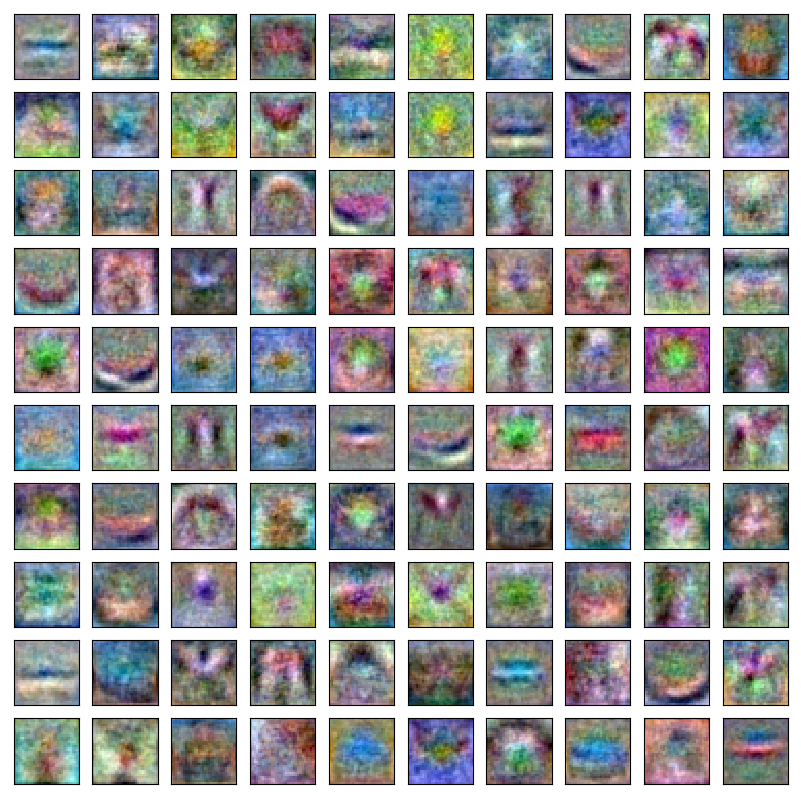

In [5]:
import PIL as pil

plt.rcParams["figure.figsize"] = (10,10)

f = plt.figure()
subplotCounter = 1

for j in range(100):

    w1 = w[j].reshape(3, 32, 32)
    w1 = np.transpose(w1, (1,2,0))
    
    # rescale pixel values
    low, high = np.min(w1), np.max(w1)
    im1 = 255.0 * (w1 - low) / (high - low)
    # im1 = (w1 - low) / (high - low)
    
    ax = f.add_subplot(10, 10, subplotCounter)
    ax.imshow(im1.astype('uint8'))
    # ax.imshow(im1)
    subplotCounter += 1
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
# plt.tight_layout()
f.savefig(os.path.join(expDir,'mlp-filter-01.png'), bbox_inches='tight')

In [6]:
net

MLP (
  (fc1): Linear (3072 -> 100)
  (fc2): Linear (100 -> 100)
  (fc3): Linear (100 -> 10)
)

In [7]:
fc1Params = list(net.fc1.parameters())
w = fc1Params[0].data.numpy() # filters
print w.shape
w

(100, 3072)


array([[-0.03054504, -0.06013873, -0.0400092 , ...,  0.00091801,
        -0.00160875,  0.02174096],
       [-0.01666111,  0.02105562,  0.01838177, ...,  0.00462694,
         0.00015687, -0.01794052],
       [-0.03757452,  0.00805541,  0.00501174, ..., -0.05465268,
        -0.02661366, -0.0148589 ],
       ..., 
       [ 0.02181003,  0.01285101,  0.00774078, ..., -0.01622101,
        -0.02905194, -0.02990368],
       [ 0.02727234, -0.00156027,  0.00620726, ..., -0.01463867,
        -0.00866443,  0.00485446],
       [ 0.04197494,  0.01305588,  0.00615728, ...,  0.0826593 ,
         0.10059494,  0.13762736]], dtype=float32)

In [14]:
net._init_weights(init_sigma=0.003)

In [15]:
fc1Params = list(net.fc1.parameters())
w = fc1Params[0].data.numpy() # filters
print w.shape
w

(100, 3072)


array([[  2.79988023e-03,   1.36678829e-03,   3.90004809e-03, ...,
          3.16561409e-03,   4.66233399e-03,  -1.26158912e-03],
       [  5.74276382e-05,   5.87134680e-04,   2.48523429e-03, ...,
          3.21627420e-04,  -4.67107538e-03,   4.62200819e-03],
       [  6.17172895e-03,   4.75285016e-03,   1.05607125e-03, ...,
         -1.20199390e-03,  -1.14060612e-03,   7.24838395e-03],
       ..., 
       [  2.24252394e-03,   2.01844214e-03,  -1.09248224e-03, ...,
         -5.73309697e-03,   1.24150619e-03,  -4.92967386e-03],
       [  8.66105023e-04,  -1.02807558e-03,  -2.24261428e-03, ...,
          1.87641045e-03,   3.13536939e-03,   4.41820780e-03],
       [  1.60290289e-03,  -2.24246620e-03,   1.31284050e-03, ...,
         -2.75813160e-03,  -1.75843423e-04,   2.36809603e-03]], dtype=float32)